In [150]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [151]:
dataset = MNIST(root='data/', download=True)

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 

In [153]:
len(dataset)

60000

In [154]:
test_data = MNIST(root='data/',train=False)
len(test_data)

10000

In [155]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

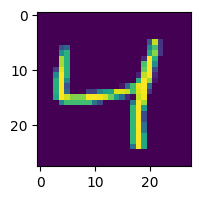

In [156]:
plt.figure(figsize=(2,2))
plt.imshow(dataset[2][0])

In [157]:
import torchvision.transforms as transforms

In [158]:
train_data = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [159]:
img_tensor,label = train_data[0]
print(img_tensor.shape,label)

torch.Size([1, 28, 28]) 5


In [160]:
print(img_tensor[0,15:20,15:20])

tensor([[0.7294, 0.9922, 0.9922, 0.5882, 0.1059],
        [0.0627, 0.3647, 0.9882, 0.9922, 0.7333],
        [0.0000, 0.0000, 0.9765, 0.9922, 0.9765],
        [0.5098, 0.7176, 0.9922, 0.9922, 0.8118],
        [0.9922, 0.9922, 0.9922, 0.9804, 0.7137]])


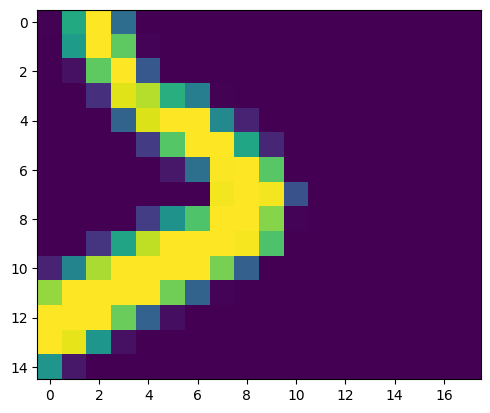

In [161]:
plt.imshow(img_tensor[0,10:25,10:30])

In [162]:
#Train and Validation set split 
from torch.utils.data import random_split
train,validation = random_split(train_data,[50000,10000])
len(train),len(validation)

(50000, 10000)

In [163]:
from torch.utils.data import DataLoader
train_dataload = DataLoader(train,batch_size=128,shuffle=True)
validation_dataload = DataLoader(validation,batch_size=128,shuffle=True)

In [175]:
import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size,num_classes)

In [176]:
list(model.parameters())
model.bias.shape

torch.Size([10])

In [177]:
for images,labels in train_dataload:
    print(labels)
    print(images.shape)
    break

tensor([4, 3, 4, 4, 9, 4, 6, 9, 9, 9, 0, 8, 1, 7, 1, 8, 3, 8, 3, 2, 9, 1, 8, 6,
        0, 9, 2, 9, 3, 2, 6, 5, 4, 7, 1, 2, 7, 4, 9, 5, 4, 1, 4, 6, 4, 3, 7, 9,
        9, 3, 2, 3, 5, 6, 9, 1, 6, 5, 7, 1, 3, 3, 5, 4, 5, 2, 2, 4, 9, 4, 6, 6,
        5, 3, 7, 5, 6, 5, 4, 5, 9, 4, 4, 7, 3, 0, 6, 1, 1, 6, 9, 0, 2, 6, 0, 8,
        6, 5, 6, 6, 8, 4, 8, 4, 9, 0, 2, 3, 7, 0, 2, 9, 0, 0, 1, 9, 2, 0, 5, 5,
        2, 8, 3, 8, 0, 4, 0, 2])
torch.Size([128, 1, 28, 28])


In [178]:
images.shape

torch.Size([128, 1, 28, 28])

In [188]:
images = images.reshape(-1,784)

In [189]:
images.shape

torch.Size([128, 784])

In [207]:
for images,labels in train_dataload:
    print(images.shape)
    images = images.reshape(128,784) #Batch size = 128
    ypred = model(images)
    break

torch.Size([128, 1, 28, 28])


In [208]:
ypred.shape

torch.Size([128, 10])

In [206]:
sum(ypred[0])

tensor(-1.2986, grad_fn=<AddBackward0>)